In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
X_test.shape

(10000, 32, 32, 3)

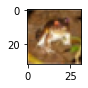

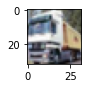

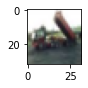

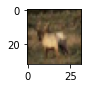

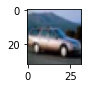

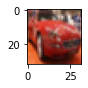

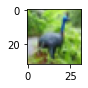

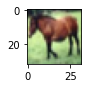

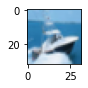

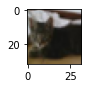

In [5]:
for i in range(10):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[i])

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[7]

'horse'

In [12]:
def plot_sample(X,y,index):
  plt.figure(figsize=(1,1))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

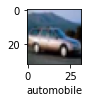

In [13]:
plot_sample(X_train,y_train,4)

In [14]:
# Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
# Build simple artificial neural network(ANN) for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8103 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6202 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5394 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4797 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4322 - accuracy: 0.4955


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.60      0.51      1000
           1       0.72      0.40      0.52      1000
           2       0.39      0.27      0.32      1000
           3       0.37      0.24      0.29      1000
           4       0.49      0.25      0.33      1000
           5       0.42      0.35      0.38      1000
           6       0.34      0.81      0.48      1000
           7       0.65      0.42      0.51      1000
           8       0.49      0.73      0.59      1000
           9       0.60      0.51      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



In [17]:
# Building using CNN(Convolution Neural Network) to train images 
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #DENSE
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4424 - accuracy: 0.4786
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0703 - accuracy: 0.6258
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9385 - accuracy: 0.6730
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8513 - accuracy: 0.7058
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7829 - accuracy: 0.7254
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7228 - accuracy: 0.7483
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6691 - accuracy: 0.7642
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6230 - accuracy: 0.7814
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5761 - accuracy: 0.7981
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.537

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8983 - accuracy: 0.7108


[0.8982592821121216, 0.7107999920845032]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.8214374e-04, 4.5201526e-04, 5.8514706e-04, 6.7207032e-01,
        4.2139729e-03, 3.1107605e-01, 3.7410271e-03, 1.7858302e-04,
        7.2209486e-03, 7.9703532e-05],
       [1.8206439e-03, 3.0375814e-01, 6.1208893e-06, 3.0353803e-07,
        5.2824017e-10, 1.2872430e-09, 4.3550799e-06, 1.2299557e-09,
        6.9409031e-01, 3.2014117e-04],
       [6.8420492e-02, 2.0081647e-02, 6.2771402e-03, 1.0008457e-03,
        3.7449159e-04, 2.1701802e-05, 4.6951949e-04, 2.0112243e-04,
        8.9959884e-01, 3.5541700e-03],
       [9.0998542e-01, 3.7152223e-02, 2.1602895e-02, 8.2939193e-03,
        2.2406859e-04, 4.6448325e-04, 1.4167059e-04, 1.6010282e-06,
        2.0570060e-02, 1.5636496e-03],
       [1.1587254e-07, 2.8654941e-07, 3.9875206e-02, 6.6673279e-02,
        5.3463215e-01, 2.2442626e-02, 3.3635551e-01, 2.0065117e-05,
        2.4656680e-07, 5.1626284e-07]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [23]:
print(y_test[:5])

[3 8 8 0 6]


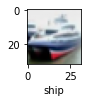

In [24]:
plot_sample(X_test, y_test,1)

In [27]:
classes[y_classes[1]]

'ship'

In [28]:
classes[y_classes[1]]

'ship'